# this program is to read individual TrapZoidal csv file and put them into one single dataframe
# Plotting trapzoidal_Off current results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
import csv
import glob
import seaborn as sns
import numpy as np

In [2]:
# enter pathway of where files are saved 
# C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys\ExtractedData
fpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData_off/'
all_files = glob.glob(fpath + "/*.csv")

In [3]:
pwd

"C:\\Users\\LingxinW\\Box\\Lingxin Wang's Files\\Python-scripts\\My_Scripts"

In [5]:
# put all individual csv dataframe files into one dataframe file df
analysis = pd.DataFrame()
for x in all_files:
    df = pd.read_csv(x)
    #f['t_half_act_on'][0]= ''
    analysis=pd.concat([analysis,df])
analysis.head(10)

,worm_strain,cell_ID,trap_rate,amp_peaks_off,t_peaks_off,t_start_act_off,t_half_act_off,t_half_decay_off,group_number
0,GN932,ALMLW007,6153,-16.145823,0.4573,0.4511,3.10,17.1,3
1,GN932,ALMLW007,11428,-15.716713,0.4570,0.4505,3.25,19.6,3
0,GN932,ALMLW007,80,-1.700251,0.5764,0.5500,13.20,8.3,3
1,GN932,ALMLW007,800,-8.064047,0.4737,0.4600,6.85,17.4,3
2,GN932,ALMLW007,7272,-16.327162,0.4562,0.4509,2.65,18.3,3
3,GN932,ALMLW007,13333,-17.266456,0.4558,0.4497,3.05,21.0,3
0,GN932,ALMLW007,2580,-12.756885,0.4611,0.4530,4.05,17.1,3
1,GN932,ALMLW007,3809,-14.293037,0.4582,0.4520,3.10,18.8,3
2,GN932,ALMLW007,7272,-14.988863,0.4579,0.4509,3.50,17.6,3
3,GN932,ALMLW007,13333,-19.210480,0.4554,0.4497,2.85,18.3,3


In [6]:
analysis['worm_strain'] # here is just to confirm all files are concatinated 

0     GN932
1     GN932
0     GN932
1     GN932
2     GN932
      ...  
0    TU2769
1    TU2769
2    TU2769
3    TU2769
4    TU2769
Name: worm_strain, Length: 120, dtype: object

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'MRC_ON (pA)')

<Figure size 432x288 with 0 Axes>

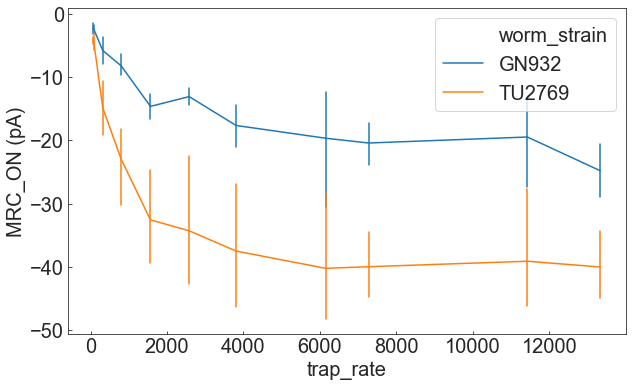

In [7]:
# plot the figures using seaborn 
# plot Trap_ON amplitude

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True, top = False, right = False)
plt.rcParams.update({'font.size': 20})
plt.rcParams['svg.fonttype'] = 'none'

#%% plotting specific data from dataframe
#order = ['TU2769', 'GN932']
#xticklabels = ['WT', 'mutant']


plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
fig = sns.lineplot(x='trap_rate', y='amp_peaks_off', data=analysis, hue = 'worm_strain',ci = 95, err_style ='bars')
plt.ylabel('MRC_ON (pA)')

#fig2 = sns.stripplot(x='stim_um', y='t_half_act_on', data=analysis, alpha=0.5,order=order)

#plt.xticks(np.arange(len(order)), xticklabels, rotation=90)  # Set text labels and properties.

In [13]:
analysis2 =  analysis[(analysis['t_half_act_off']>0)] # here to make sure time to half peak is positive


No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Activation t1/2 (ms)')

<Figure size 432x288 with 0 Axes>

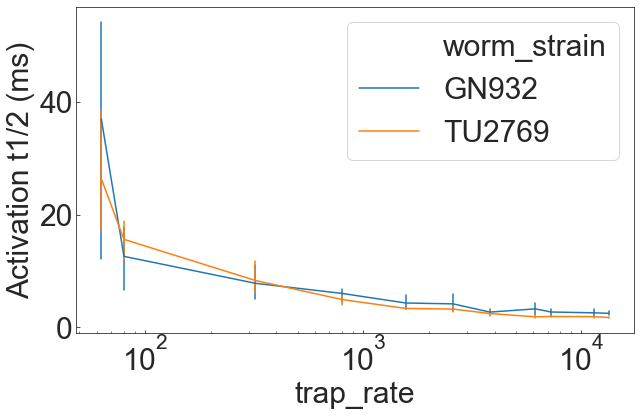

In [11]:
# plot the figures using seaborn 
# plot Trap_ON Activation t1/2



sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
fig = sns.lineplot(x='trap_rate', y='t_half_act_off', data=analysis2, hue = 'worm_strain', err_style ='bars')
fig.set(xscale="log")
plt.ylabel('Activation t1/2 (ms)')

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Decay t1/2 (ms)')

<Figure size 432x288 with 0 Axes>

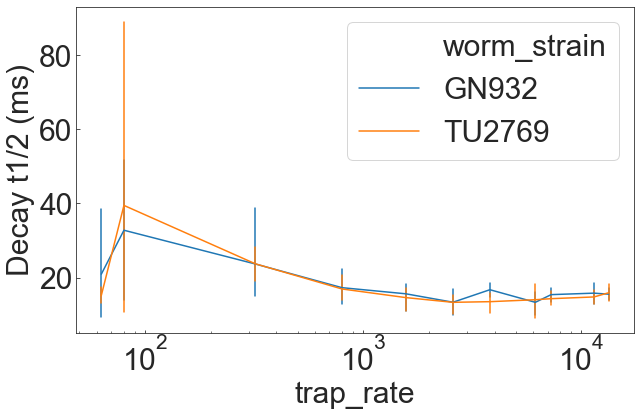

In [16]:
# plot the figures using seaborn 
# plot Trap_ON Decay t1/2

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
fig = sns.lineplot(x='trap_rate', y='t_half_decay_off', data=analysis, hue = 'worm_strain', err_style ='bars')
fig.set(xscale="log")
plt.ylabel('Decay t1/2 (ms)')